In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    number1: int 
    operation: str 
    number2: int
    result: int

In [3]:
def Add(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["result"] = state["number1"] + state["number2"]
    return state

def Subtract(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["result"] = state["number1"] - state["number2"]
    return state


def Rout(state:AgentState) -> AgentState:
    """This node will routs to the next node of the graph"""
    if state["operation"] == "+":
        return "addition"
    
    elif state["operation"] == "-":
        return "subtraction" 



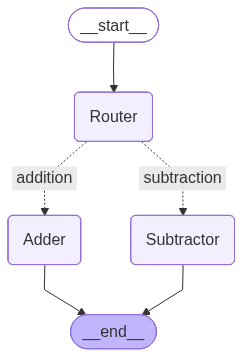

In [6]:
graph = StateGraph(AgentState)

graph.add_node("Adder", Add)
graph.add_node("Subtractor", Subtract)
graph.add_node("Router", lambda state:state) 

graph.add_edge(START, "Router") 

graph.add_conditional_edges(
    "Router",
    Rout, 
    {
        # Edge: Node
        "addition": "Adder",
        "subtraction": "Subtractor"
    }

)

graph.add_edge("Adder", END)
graph.add_edge("Subtractor", END)

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
st1 = AgentState(number1 = 10, operation="-", number2 = 5)
print(app.invoke(st1))

result = app.invoke({"number1": 10, "operation": "-", "number2": 5})
print(result)

{'number1': 10, 'operation': '-', 'number2': 5, 'result': 5}
{'number1': 10, 'operation': '-', 'number2': 5, 'result': 5}
